In [166]:
#importing data management, data visualisation libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_excel('/Users/Z002KG2/Downloads/KL_Real_Estate_dataclean_v3.xlsx')
df

,Location,Price,Rooms,Bathrooms,Car Parks,No of Storey,Property Type,Position,Type,Size,Furnishing
0,"KLCC, Kuala Lumpur",1250000.0,3,3,2,0.0,Serviced Residence,Unknown,Built-up,1335,Fully Furnished
1,"Damansara Heights, Kuala Lumpur",6800000.0,6,7,0,0.0,Bungalow,Unknown,Land area,6900,Partly Furnished
2,"Dutamas, Kuala Lumpur",1030000.0,3,4,2,0.0,Condominium,Corner,Built-up,1875,Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,0,0,0,0.0,NaN,Unknown,Unknown,0,Unknown
4,"Bukit Jalil, Kuala Lumpur",900000.0,5,3,2,0.0,Condominium,Corner,Built-up,1513,Partly Furnished
...,...,...,...,...,...,...,...,...,...,...,...
53878,"Bangsar, Kuala Lumpur",5100000.0,6,4,0,0.0,Bungalow,Corner,Land area,7168,Fully Furnished
53879,"Bangsar, Kuala Lumpur",5000000.0,5,4,0,0.0,Bungalow,Intermediate,Land area,15000,Unfurnished
53880,"Bangsar, Kuala Lumpur",5500000.0,6,4,0,0.0,Bungalow,Intermediate,Land area,7168,Partly Furnished
53881,"Wangsa Maju, Kuala Lumpur",480000.0,3,2,0,0.0,Condominium,Intermediate,Built-up,1150,Unfurnished


In [167]:
df.duplicated().sum()

4784

In [168]:
df.drop_duplicates(inplace=True)

In [169]:
df.drop(columns=['Type'], inplace=True)

In [170]:
df.fillna(value={'Car Parks':0, 'Furnishing': 'Unknown', 'Property Type':'Unknown', 'No of Sty':0, 'Bathrooms':0, 'No of Storey': 0}, inplace=True)

In [171]:
df.isna().sum()

Location           0
Price            218
Rooms              0
Bathrooms          0
Car Parks          0
No of Storey       0
Property Type      0
Position           0
Size               0
Furnishing         0
dtype: int64

In [172]:
df.dropna(inplace=True)

In [173]:
df.isna().sum()

Location         0
Price            0
Rooms            0
Bathrooms        0
Car Parks        0
No of Storey     0
Property Type    0
Position         0
Size             0
Furnishing       0
dtype: int64

In [ ]:
#df['No of Storey'] = df['No of Storey'].str.replace('-sty', '')

In [177]:
df['Size'] = df['Size'].replace(' Kuala Lumpur',1)
df['Size'] = df['Size'].replace(' Malaysia',2)
df['Size'] = df['Size'].astype(float)
df['Size']=df['Size'].replace(1,df['Size'].mean())
df['Size']=df['Size'].replace(2,df['Size'].median())


In [178]:
value_counts = df['Size'].value_counts()

print(value_counts)

Size
0.0        1086
1650.0      871
1400.0      587
1100.0      537
1760.0      474
           ... 
6463.0        1
4316.0        1
28667.0       1
28500.0       1
6050.0        1
Name: count, Length: 4143, dtype: int64


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48881 entries, 0 to 53882
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       48881 non-null  object 
 1   Price          48881 non-null  float64
 2   Rooms          48881 non-null  int64  
 3   Bathrooms      48881 non-null  int64  
 4   Car Parks      48881 non-null  int64  
 5   No of Storey   48881 non-null  float64
 6   Property Type  48881 non-null  object 
 7   Position       48881 non-null  object 
 8   Size           0 non-null      object 
 9   Furnishing     48881 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.1+ MB


In [179]:
df['No of Storey'] = df['No of Storey'].astype(float)
df['Car Parks'] = df['Car Parks'].astype(int)
df['Bathrooms'] = df['Bathrooms'].astype(int)
df['Size'] = df['Size'].astype(float)

In [61]:
#df['Size'] = df['Size'].replace({0, mean}, inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49105 entries, 0 to 53882
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       49105 non-null  object 
 1   Price          49105 non-null  float64
 2   Rooms          49105 non-null  int64  
 3   Car Parks      49105 non-null  int64  
 4   No of Sty      49105 non-null  float64
 5   Property Type  49105 non-null  object 
 6   Position       49105 non-null  object 
 7   Size           0 non-null      object 
 8   Furnishing     49105 non-null  object 
 9   Bathrooms      49105 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 4.1+ MB


In [84]:
df.isna().sum()

Location         0
Price            0
Rooms            0
Car Parks        0
No of Sty        0
Property Type    0
Position         0
Size             0
Furnishing       0
Bathrooms        0
dtype: int64

Location: 0.5893
Rooms: 0.5025
Bathrooms: 0.6199
Car Parks: 0.2910
No of Storey: 0.0837
Property Type: 0.5719
Position: 0.1556
Size: 1.2200
Furnishing: 0.1831


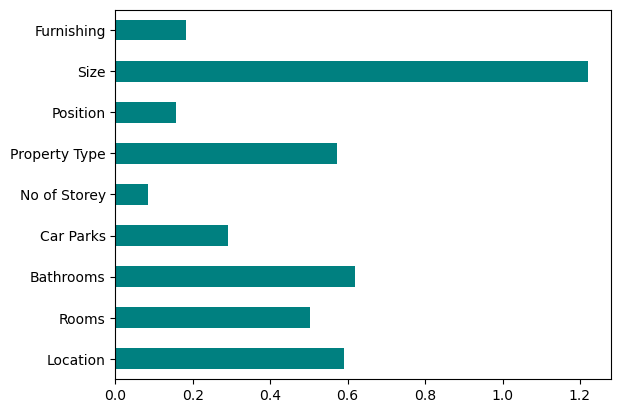

In [180]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

df.head(10)

# Encode categorical variables with LabelEncoder
encoder = LabelEncoder()
df['Location'] = encoder.fit_transform(df['Location'])
df['Property Type'] = encoder.fit_transform(df['Property Type'])
df['Position'] = encoder.fit_transform(df['Position'])
df['Furnishing'] = encoder.fit_transform(df['Furnishing'])

# features (X) and target variable (y)
X = df.drop(columns=['Price'])
y = df['Price']

# Compute mutual information scores
mi_scores = mutual_info_classif(X, y)

# Print feature importance scores
for feature, score in zip(X.columns, mi_scores):
    print(f"{feature}: {score:.4f}")


feat_importances = pd.Series(mi_scores, X.columns[0:len(df.columns)])
feat_importances.plot(kind='barh', color = 'teal')
plt.show()

In [181]:
X = df[['Location', 'Rooms', 'Property Type', 'Size','Bathrooms']]
y = df['Price']

In [190]:
df.columns 

Index(['Location', 'Price', 'Rooms', 'Bathrooms', 'Car Parks', 'No of Storey',
       'Property Type', 'Position', 'Size', 'Furnishing'],
      dtype='object')

In [182]:
def regressionMethods(x, y, regressionObject):
  train_x, test_x, train_y, test_y= train_test_split(x,y,test_size=0.1, random_state=1)
  regressionObject.fit(train_x, train_y)
  predict_test=regressionObject.predict(test_x)
  df_m=pd.DataFrame({'features':x.columns,'coeff':regressionObject.coef_})
  df_m=df_m.sort_values(by=['coeff'])
  df_m.plot(x='features', y='coeff', kind='bar', figsize=(15,10))
  plt.show()
  print("RSquare Value for TEST data is : ",  np.round(regressionObject.score(test_x, test_y)*100, 0))
  print("RSquare Value for TRAIN data is : ", np.round(regressionObject.score(train_x, train_y)*100, 0))
  print("MSE for Test data is : ",np.round(metrics.mean_squared_error(test_y, predict_test), 0))
  print("MAE for Test data is : ",np.round(metrics.mean_absolute_error(test_y, predict_test), 0))

In [183]:
import sklearn
import seaborn as sns
import sklearn
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline


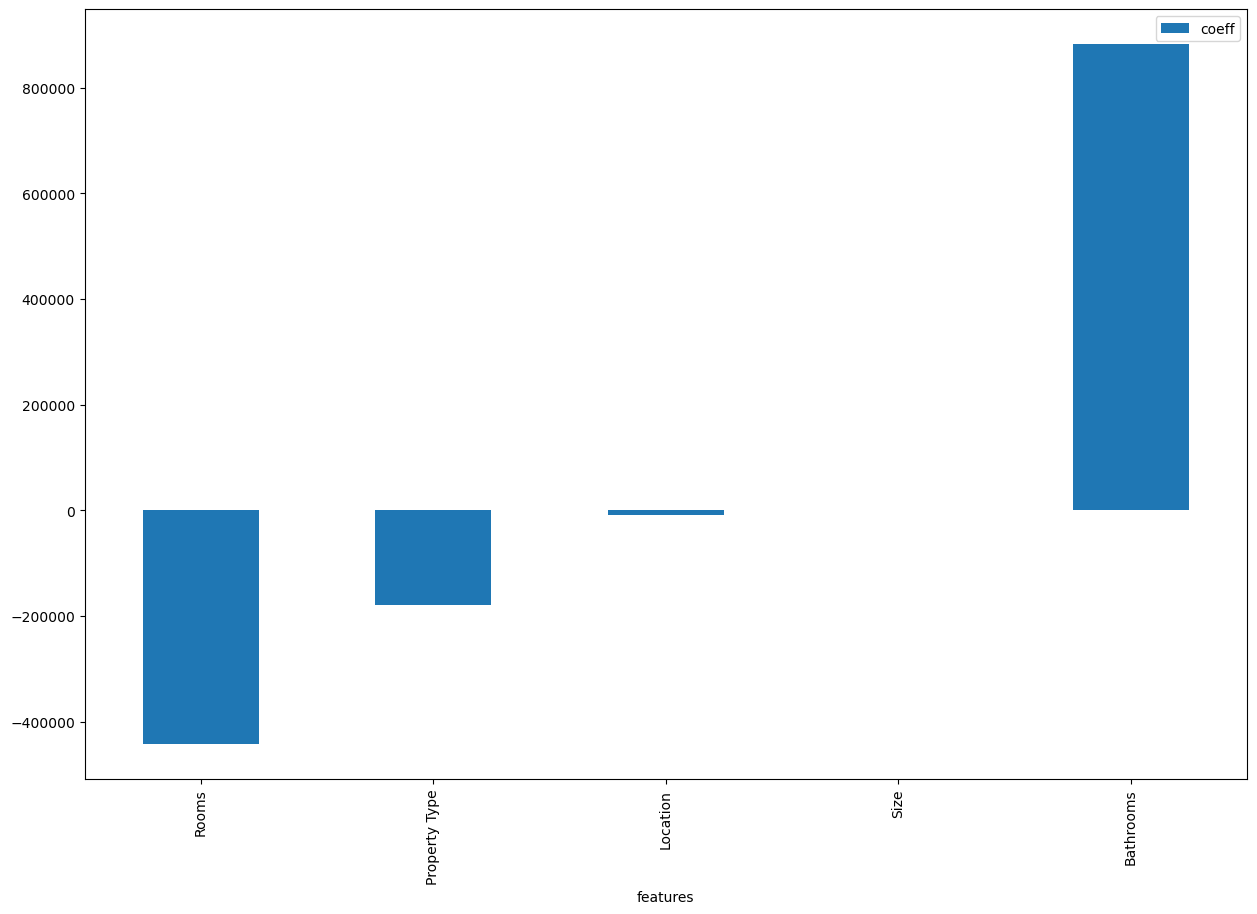

RSquare Value for TEST data is :  15.0
RSquare Value for TRAIN data is :  1.0
MSE for Test data is :  21994696344368.0
MAE for Test data is :  1417439.0


In [184]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
regressionMethods(X, y, lm)

In [195]:
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression

scaler = Normalizer()
unit_scaled_data = scaler.fit_transform(df)

# Separate features (X) and target variable (y)
# Index 0:'Location', 1:'Price', 2'Rooms', 3:'Bathrooms', 4:'Car Parks', 5:'No of Storey',
#6:'Property Type', 7:'Position', 8:'Size', 9:'Furnishing'
columns_to_keep = [0, 2, 3, 6, 8]
X_normalized = unit_scaled_data[:, columns_to_keep]
Y_normalized = unit_scaled_data[:, 1]

# Splitting the data into train and test sets
train_x, test_x, train_y, test_y = train_test_split(X_normalized, Y_normalized, test_size=0.25, random_state=1)

# Training the model
regressionObject = LinearRegression()
regressionObject.fit(train_x, train_y)

# Predicting on the test set
predict_test = regressionObject.predict(test_x)

# Calculating evaluation metrics
r_square_test = regressionObject.score(test_x, test_y)
r_square_train = regressionObject.score(train_x, train_y)
mse_test = metrics.mean_squared_error(test_y, predict_test)
mae_test = metrics.mean_absolute_error(test_y, predict_test)

# Printing the results
print("RSquare Value for TEST data is:", np.round(r_square_test * 100, 2))
print("RSquare Value for Train data is:", np.round(r_square_train * 100, 2))
print("MSE for Test data is:", mse_test)
print("MAE for Test data is:", mae_test)

RSquare Value for TEST data is: 74.27
RSquare Value for Train data is: 78.27
MSE for Test data is: 9.214106086108769e-05
MAE for Test data is: 0.0009160378917863776


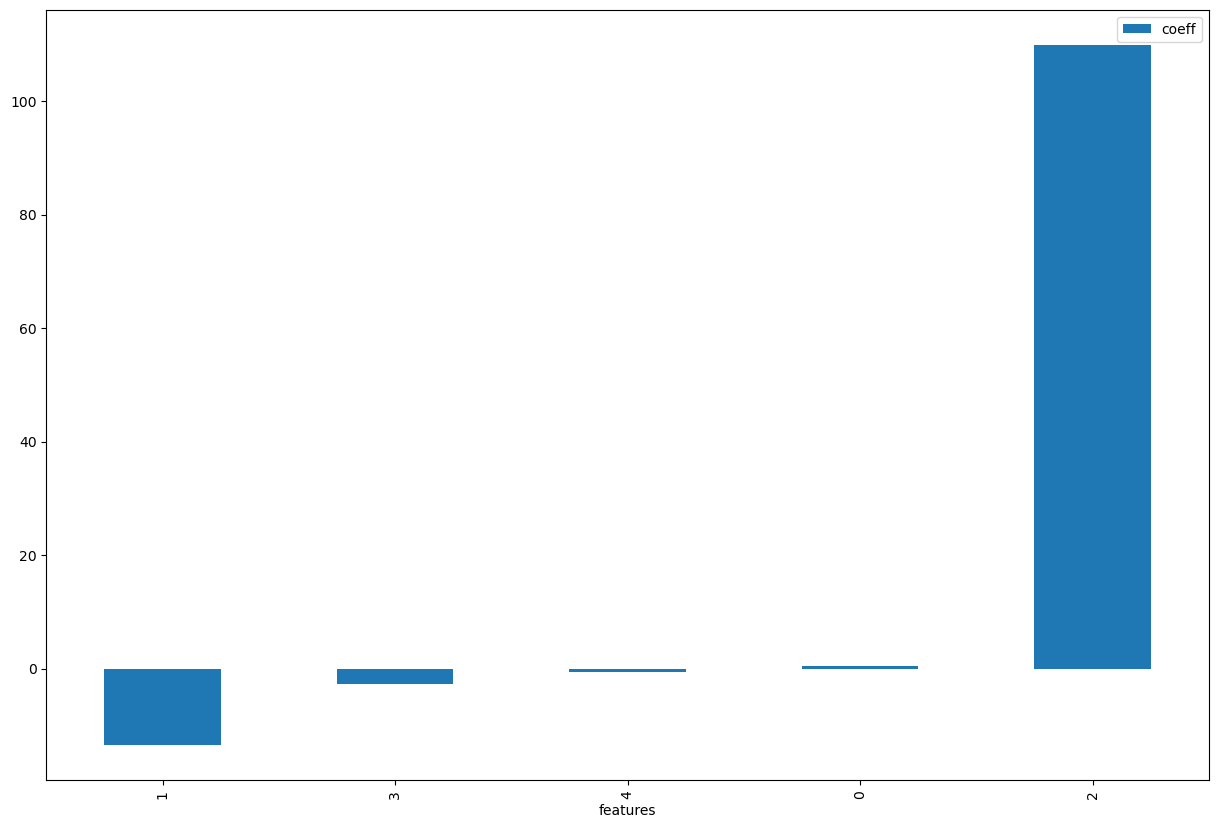

In [196]:
x1 = pd.DataFrame(X_normalized)

df_m=pd.DataFrame({'features':x1.columns,'coeff':regressionObject.coef_})
df_m=df_m.sort_values(by=['coeff'])
df_m.plot(x='features', y='coeff', kind='bar', figsize=(15,10))
plt.show()

In [193]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
unit_scaled_data = scaler.fit_transform(df)

# Separate features (X) and target variable (y)
# All the fields 'Location', 'Rooms', 'Car Parks', 'No of Storey', 'Property Type','Position', 'Size', 'Furnishing', 'Bathrooms'
columns_to_keep = [0, 2, 3, 4, 5, 6, 7, 8, 9]
X_normalized = unit_scaled_data[:, columns_to_keep]
Y_normalized = unit_scaled_data[:, 1]

# Splitting the data into train and test sets
train_x, test_x, train_y, test_y = train_test_split(X_normalized, Y_normalized, test_size=0.25, random_state=1)

# Training the model
regressionObject = LinearRegression()
regressionObject.fit(train_x, train_y)

# Predicting on the test set
predict_test = regressionObject.predict(test_x)

# Calculating evaluation metrics
r_square_test = regressionObject.score(test_x, test_y)
r_square_train = regressionObject.score(train_x, train_y)
mse_test = metrics.mean_squared_error(test_y, predict_test)
mae_test = metrics.mean_absolute_error(test_y, predict_test)

# Printing the results
print("RSquare Value for TEST data is:", np.round(r_square_test * 100, 2))
print("RSquare Value for Train data is:", np.round(r_square_train * 100, 2))
print("MSE for Test data is:", mse_test)
print("MAE for Test data is:", mae_test)



RSquare Value for TEST data is: 75.57
RSquare Value for Train data is: 80.11
MSE for Test data is: 8.747448031938856e-05
MAE for Test data is: 0.0009243186021915487


In [192]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
unit_scaled_data = scaler.fit_transform(df)

# Separate features (X) and target variable (y)
# Index 0 = Location, 6: 'Property Type', 8: 'Size', 3: 'Bathrooms' -- 3 variables
columns_to_keep = [0, 6, 8, 3]
X_normalized = unit_scaled_data[:, columns_to_keep]
Y_normalized = unit_scaled_data[:, 1]

# Splitting the data into train and test sets
train_x, test_x, train_y, test_y = train_test_split(X_normalized, Y_normalized, test_size=0.25, random_state=1)

# Training the model
regressionObject = LinearRegression()
regressionObject.fit(train_x, train_y)

# Predicting on the test set
predict_test = regressionObject.predict(test_x)

# Calculating evaluation metrics
r_square_test = regressionObject.score(test_x, test_y)
r_square_train = regressionObject.score(train_x, train_y)
mse_test = metrics.mean_squared_error(test_y, predict_test)
mae_test = metrics.mean_absolute_error(test_y, predict_test)

# Printing the results
print("RSquare Value for TEST data is:", np.round(r_square_test * 100, 2))
print("RSquare Value for Train data is:", np.round(r_square_train * 100, 2))
print("MSE for Test data is:", mse_test)
print("MAE for Test data is:", mae_test)

RSquare Value for TEST data is: 74.12
RSquare Value for Train data is: 78.24
MSE for Test data is: 9.266959911401033e-05
MAE for Test data is: 0.0009173275039878108


In [104]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
unit_scaled_data = scaler.fit_transform(df)

# Separate features (X) and target variable (y)
# All the fields 'Location', 'Rooms', 'Car Parks', 'Property Type', 'Size', 'Bathrooms'
columns_to_keep = [0, 2, 3, 4, 5, 7]
X_normalized = unit_scaled_data[:, columns_to_keep]
Y_normalized = unit_scaled_data[:, 1]

# Splitting the data into train and test sets
train_x, test_x, train_y, test_y = train_test_split(X_normalized, Y_normalized, test_size=0.25, random_state=1)

# Training the model
regressionObject = LinearRegression()
regressionObject.fit(train_x, train_y)

# Predicting on the test set
predict_test = regressionObject.predict(test_x)

# Calculating evaluation metrics
r_square_test = regressionObject.score(test_x, test_y)
r_square_train = regressionObject.score(train_x, train_y)
mse_test = metrics.mean_squared_error(test_y, predict_test)
mae_test = metrics.mean_absolute_error(test_y, predict_test)

# Printing the results
print("RSquare Value for TEST data is:", np.round(r_square_test * 100, 2))
print("RSquare Value for Train data is:", np.round(r_square_train * 100, 2))
print("MSE for Test data is:", mse_test)
print("MAE for Test data is:", mae_test)

RSquare Value for TEST data is: 71.02
RSquare Value for Train data is: 77.25
MSE for Test data is: 4.8484334165190275e-05
MAE for Test data is: 0.0009272213122605091


In [200]:
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression

scaler = Normalizer()
unit_scaled_data = scaler.fit_transform(df)

# Separate features (X) and target variable (y)
# Index 0:'Location', 1:'Price', 2'Rooms', 3:'Bathrooms', 4:'Car Parks', 5:'No of Storey',
#6:'Property Type', 7:'Position', 8:'Size', 9:'Furnishing'
columns_to_keep = [0, 2, 8]
X_normalized = unit_scaled_data[:, columns_to_keep]
Y_normalized = unit_scaled_data[:, 1]

# Splitting the data into train and test sets
train_x, test_x, train_y, test_y = train_test_split(X_normalized, Y_normalized, test_size=0.25, random_state=1)

# Training the model
regressionObject = LinearRegression()
regressionObject.fit(train_x, train_y)

# Predicting on the test set
predict_test = regressionObject.predict(test_x)

# Calculating evaluation metrics
r_square_test = regressionObject.score(test_x, test_y)
r_square_train = regressionObject.score(train_x, train_y)
mse_test = metrics.mean_squared_error(test_y, predict_test)
mae_test = metrics.mean_absolute_error(test_y, predict_test)

# Printing the results
print("RSquare Value for TEST data is:", np.round(r_square_test * 100, 2))
print("RSquare Value for Train data is:", np.round(r_square_train * 100, 2))
print("MSE for Test data is:", mse_test)
print("MAE for Test data is:", mae_test)

RSquare Value for TEST data is: 71.48
RSquare Value for Train data is: 76.4
MSE for Test data is: 0.00010212654326180306
MAE for Test data is: 0.0009759306241680523


In [201]:
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression

scaler = Normalizer()
unit_scaled_data = scaler.fit_transform(df)

# Separate features (X) and target variable (y)
# Index 0:'Location', 1:'Price', 2'Rooms', 3:'Bathrooms', 4:'Car Parks', 5:'No of Storey',
#6:'Property Type', 7:'Position', 8:'Size', 9:'Furnishing'
columns_to_keep = [0, 2, 3, 8]
X_normalized = unit_scaled_data[:, columns_to_keep]
Y_normalized = unit_scaled_data[:, 1]

# Splitting the data into train and test sets
train_x, test_x, train_y, test_y = train_test_split(X_normalized, Y_normalized, test_size=0.25, random_state=1)

# Training the model
regressionObject = LinearRegression()
regressionObject.fit(train_x, train_y)

# Predicting on the test set
predict_test = regressionObject.predict(test_x)

# Calculating evaluation metrics
r_square_test = regressionObject.score(test_x, test_y)
r_square_train = regressionObject.score(train_x, train_y)
mse_test = metrics.mean_squared_error(test_y, predict_test)
mae_test = metrics.mean_absolute_error(test_y, predict_test)

# Printing the results
print("RSquare Value for TEST data is:", np.round(r_square_test * 100, 2))
print("RSquare Value for Train data is:", np.round(r_square_train * 100, 2))
print("MSE for Test data is:", mse_test)
print("MAE for Test data is:", mae_test)

RSquare Value for TEST data is: 74.05
RSquare Value for Train data is: 77.97
MSE for Test data is: 9.293022174000378e-05
MAE for Test data is: 0.0009281024975466444
